In [2]:
import tensorflow as tf

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [4]:
print(tf.__version__)

2.5.0-rc1


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('./wine_class.csv')

In [7]:
df.head()

,Class,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,1,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,1,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185
3,1,14.37,2.50,16.8,113,3.85,3.49,0.24,7.80,0.86,1480
4,1,13.24,2.87,21.0,118,2.80,2.69,0.39,4.32,1.04,735


In [8]:
t = df['Class']
x = df.drop('Class', axis = 1)

In [11]:
x.head()

,Alcohol,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Color intensity,Hue,Proline
0,14.23,2.43,15.6,127,2.80,3.06,0.28,5.64,1.04,1065
1,13.20,2.14,11.2,100,2.65,2.76,0.26,4.38,1.05,1050
2,13.16,2.67,18.6,101,2.80,3.24,0.30,5.68,1.03,1185
3,14.37,2.50,16.8,113,3.85,3.49,0.24,7.80,0.86,1480
4,13.24,2.87,21.0,118,2.80,2.69,0.39,4.32,1.04,735


In [12]:
x.shape

(178, 10)

In [13]:
type(x)

pandas.core.frame.DataFrame

In [14]:
type(x.values)

numpy.ndarray

In [15]:
np.unique(t)

array([1, 2, 3])

In [17]:
t = t.values - 1
x = x.values

In [18]:
t, type(t)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2]),
 numpy.ndarray)

In [19]:
x, type(x)

(array([[1.423e+01, 2.430e+00, 1.560e+01, ..., 5.640e+00, 1.040e+00,
         1.065e+03],
        [1.320e+01, 2.140e+00, 1.120e+01, ..., 4.380e+00, 1.050e+00,
         1.050e+03],
        [1.316e+01, 2.670e+00, 1.860e+01, ..., 5.680e+00, 1.030e+00,
         1.185e+03],
        ...,
        [1.327e+01, 2.260e+00, 2.000e+01, ..., 1.020e+01, 5.900e-01,
         8.350e+02],
        [1.317e+01, 2.370e+00, 2.000e+01, ..., 9.300e+00, 6.000e-01,
         8.400e+02],
        [1.413e+01, 2.740e+00, 2.450e+01, ..., 9.200e+00, 6.100e-01,
         5.600e+02]]),
 numpy.ndarray)

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size = 0.7, random_state = 0)

In [21]:
x_train.shape, x_train.dtype, x_test.shape, x_test.dtype

((124, 10), dtype('float64'), (54, 10), dtype('float64'))

In [22]:
t_train.shape, t_train.dtype, t_test.shape, t_test.dtype

((124,), dtype('int64'), (54,), dtype('int64'))

In [23]:
x_train = np.array(x_train, np.float32)
x_test = np.array(x_test, np.float32)
t_train = np.array(t_train, np.int32)
t_test = np.array(t_test, np.int32)

In [24]:
import os, random

def reset_seed(seed = 0):
    os.environ['PYTHONHASHSEED'] = '0'
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

In [25]:
from tensorflow.keras import models, layers

In [26]:
reset_seed(0)

model = models.Sequential([
    layers.Dense(units = 10, activation = 'relu', input_shape = (10,)),
    layers.Dense(units = 3, activation = 'softmax'),
])

In [27]:
model.compile(optimizer = 'sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [28]:
history = model.fit(x_train, t_train,
                   batch_size = 10,
                   epochs = 10,
                   validation_data = (x_test, t_test))

Epoch 1/10
13/13 [==============================] - 0s 11ms/step - loss: 1001.3992 - accuracy: 0.3530 - val_loss: 1.0983 - val_accuracy: 0.4074
Epoch 2/10
13/13 [==============================] - 0s 2ms/step - loss: 1.0986 - accuracy: 0.3744 - val_loss: 1.0968 - val_accuracy: 0.4074
Epoch 3/10
13/13 [==============================] - 0s 2ms/step - loss: 1.0988 - accuracy: 0.3322 - val_loss: 1.0961 - val_accuracy: 0.4074
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 1.0981 - accuracy: 0.3497 - val_loss: 1.0955 - val_accuracy: 0.4074
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 1.0948 - accuracy: 0.4345 - val_loss: 1.0944 - val_accuracy: 0.4074
Epoch 6/10
13/13 [==============================] - 0s 2ms/step - loss: 1.0954 - accuracy: 0.3913 - val_loss: 1.0935 - val_accuracy: 0.4074
Epoch 7/10
13/13 [==============================] - 0s 2ms/step - loss: 1.0972 - accuracy: 0.3555 - val_loss: 1.0929 - val_accuracy: 0.4074
Epoch 8/10
13/13

In [29]:
history.history

{'loss': [494.3856506347656,
  1.0981626510620117,
  1.0972340106964111,
  1.0966664552688599,
  1.0963795185089111,
  1.0955145359039307,
  1.094819188117981,
  1.0944644212722778,
  1.0941150188446045,
  1.0940911769866943],
 'accuracy': [0.2983871102333069,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827,
  0.39516130089759827],
 'val_loss': [1.0982980728149414,
  1.0968209505081177,
  1.0960627794265747,
  1.095515489578247,
  1.0943995714187622,
  1.0935187339782715,
  1.0929051637649536,
  1.0925047397613525,
  1.091974139213562,
  1.091310977935791],
 'val_accuracy': [0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854,
  0.40740740299224854]}

In [30]:
result = pd.DataFrame(history.history)
result.head()

,loss,accuracy,val_loss,val_accuracy
0,494.385651,0.298387,1.098298,0.407407
1,1.098163,0.395161,1.096821,0.407407
2,1.097234,0.395161,1.096063,0.407407
3,1.096666,0.395161,1.095515,0.407407
4,1.096380,0.395161,1.094400,0.407407


<AxesSubplot:>

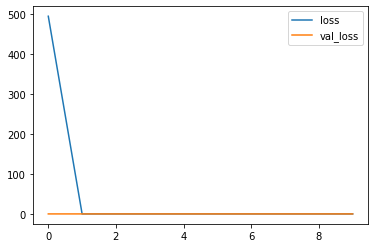

In [31]:
result[['loss', 'val_loss']].plot()

<AxesSubplot:>

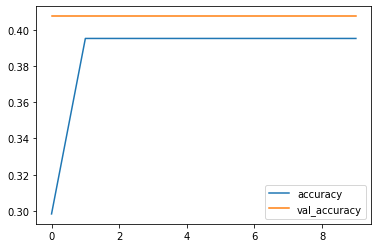

In [32]:
result[['accuracy', 'val_accuracy']].plot()

In [33]:
reset_seed(0)

model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape = (10,)),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax'),
])

model.compile(optimizer = 'sgd',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

history = model.fit(x_train, t_train,
                   batch_size = 10,
                   epochs = 50,
                   validation_data = (x_test, t_test))

Epoch 1/50
13/13 [==============================] - 0s 10ms/step - loss: 1.1679 - accuracy: 0.3845 - val_loss: 6.3959 - val_accuracy: 0.2407
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 1.0557 - accuracy: 0.4994 - val_loss: 4.5831 - val_accuracy: 0.3519
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.9445 - accuracy: 0.5475 - val_loss: 3.9581 - val_accuracy: 0.5741
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.8214 - accuracy: 0.6580 - val_loss: 3.5925 - val_accuracy: 0.5926
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.8320 - accuracy: 0.6580 - val_loss: 3.3412 - val_accuracy: 0.5926
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.8015 - val_loss: 3.0576 - val_accuracy: 0.5741
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.5438 - accuracy: 0.8691 - val_loss: 2.7988 - val_accuracy: 0.5741
Epoch 8/50
13/13 [=

<AxesSubplot:>

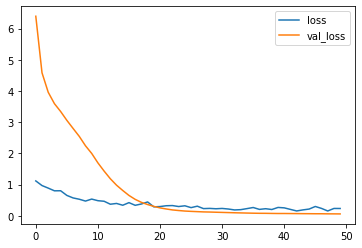

In [34]:
result_batchnorm = pd.DataFrame(history.history)
result_batchnorm[['loss', 'val_loss']].plot()

<AxesSubplot:>

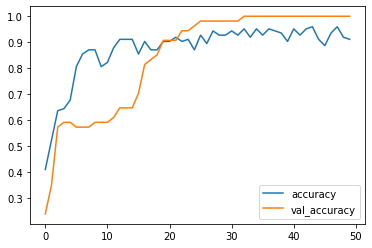

In [35]:
result_batchnorm[['accuracy', 'val_accuracy']].plot()

In [36]:
model.save(filepath = './wine_model.h5', save_format = 'h5')

In [37]:
loaded_model = tf.keras.models.load_model('./wine_model.h5')

In [48]:
sample = x_train[0]
sample.shape

(10,)

In [49]:
sample = sample.reshape(1, 10)
sample.shape

(1, 10)

In [50]:
y = loaded_model.predict(sample)
y

array([[0.9737636 , 0.00732896, 0.01890746]], dtype=float32)

In [51]:
np.argmax(y)

0

In [52]:
t_train[0]

0